##                             Sports and Media celebrities - Image Classification

In [1]:
### import required modules and packages
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

**For this image classification project, we are going to take some celebrity images. We are going to detect the face from an image, and then identify the eyes. we will accept only if the image has two eyes, or neglect.** 

**We are going to use opencv haar cascade for this pre-processing**

1. Read the image from the image file path using cv2.imread
2. Convert the RGB color image into gray image using cv2.cvtColor
3. Use face cascadeClassifier from the haarcascade xml
4. Detect the face from an gray image using detectmultiscale
5. One image can have more than one face, so loop through the faces
    1. the output face is in the format of (x,y,w,h)
    2. Crop the gray image and color image for the size [y:y+h, x:x+w]
    3. then use eye cascade classifier from haarcascade xml to detect eyes from the faces
    4. return the color Region of Interest(roi_color) image only if it has two eyes

In [2]:
## this function is to crop the image from the provided image_path
def get_cropped_image(image_path):
    image=cv2.imread(image_path)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray_image[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2 :
            return roi_color

**Next step is to define the locations/paths of the original image folder**

In [3]:
path_to_original_data = "./dataset/" ### directory named dataset in the current location of this notebook

**Get the path of all sub directories inside the dataset directory, where we stored the original images of celebrities in separate folders** 

In [4]:
import os
image_dirs = []
for entry in os.scandir(path_to_original_data): ## scandir function is used to scan the dataset directory
    if entry.is_dir():  # checks whether the entry is directory or a file
        image_dirs.append(entry.path) # if directory append the path of that dir into image_dirs

In [5]:
print(image_dirs)

['./dataset/cristiano_ronaldo', './dataset/ellen_pompeo', './dataset/hrithik_roshan', './dataset/mahendra_singh_dhoni', './dataset/megan_boone', './dataset/priyanka_chopra', './dataset/roger_federer', './dataset/trisha_krishnan']


**Now lets create one cropped_image folder inside dataset folder where we are going to save our cropped images**

In [14]:
path_to_cropped_data = "./dataset/cropped_folder/"
import shutil
if os.path.exists(path_to_cropped_data): ## checks whether folder is available
    shutil.rmtree(path_to_cropped_data) ## is available, delete folder and all its sub folder and files
os.mkdir(path_to_cropped_data) ## function to create directory

**Now go through the dataset folder and sub folder of each celebrity.
Then save the cropped image into the folder named cropped_folder by creating separate folder for each celebrity**

1. Go through the dataset folder and sub folder of each celebrity(locations of te celebrity folders are saved in "image_dirs")
2. Get the celebrity name from the celebrity folder name 
3. Scan through the celebrity folder to get one image at a time
    1. Crop the image using our function "get_cropped_image"
    2. If image is cropped and folder is not exists then create one folder for the celebrity inside cropped_folder like "cropped_folder/celebrity_name"
    3. Append the path of that folder in one list "cropped_imag_dirs"
    4. Then save the cropped image inside that celebrity folder with an incremental image_name



In [15]:
cropped_image_dirs = []
#celebrity_cropped_image_dict = {}
for image_dir in image_dirs:
    count = 1
    celebrity_name = image_dir.split('/')[-1]
    #celebrity_cropped_image_dict[celebrity_name] = []
    for entry in os.scandir(image_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_celebrity_folder = path_to_cropped_data + celebrity_name 
            if not os.path.exists(cropped_celebrity_folder):
                os.makedirs(cropped_celebrity_folder)
                cropped_image_dirs.append(cropped_celebrity_folder)
                print('Celebrity folder created',cropped_celebrity_folder)
            cropped_image_name = celebrity_name + str(count) + ".png"
            cropped_image_path = cropped_celebrity_folder + "/" + cropped_image_name
            cv2.imwrite(cropped_image_path, roi_color)
            #celebrity_cropped_image_dict[celebrity_name].append(cropped_image_path)
            count += 1

Celebrity folder created ./dataset/cropped_folder/cristiano_ronaldo
Celebrity folder created ./dataset/cropped_folder/ellen_pompeo
Celebrity folder created ./dataset/cropped_folder/hrithik_roshan
Celebrity folder created ./dataset/cropped_folder/mahendra_singh_dhoni
Celebrity folder created ./dataset/cropped_folder/megan_boone
Celebrity folder created ./dataset/cropped_folder/priyanka_chopra
Celebrity folder created ./dataset/cropped_folder/roger_federer
Celebrity folder created ./dataset/cropped_folder/trisha_krishnan


In [16]:
print(cropped_image_dirs)

['./dataset/cropped_folder/cristiano_ronaldo', './dataset/cropped_folder/ellen_pompeo', './dataset/cropped_folder/hrithik_roshan', './dataset/cropped_folder/mahendra_singh_dhoni', './dataset/cropped_folder/megan_boone', './dataset/cropped_folder/priyanka_chopra', './dataset/cropped_folder/roger_federer', './dataset/cropped_folder/trisha_krishnan']


**Now, cropped image is ready for all the images. Manually examine the cropped images and delete the unwanted images**

Create one dict to store all the images path for each celebrity
1. Go through the cropped_image_dirs where we saved all the directories path of each celebrity
2. Create one key for the celebrity name in the dict named "celebrity_cropped_image_dict" with empty list as value
2. Append the path of image saved in the dict value of that celebrity

In [17]:
celebrity_cropped_image_dict = {}
for image_dir in cropped_image_dirs:
    celebrity_name = image_dir.split('/')[-1]
    cropped_image_paths = []
    print(image_dir)
    for entry in os.scandir(image_dir):
        print(entry.path)
        cropped_image_paths.append(entry.path)
    celebrity_cropped_image_dict[celebrity_name] = cropped_image_paths
celebrity_cropped_image_dict

./dataset/cropped_folder/cristiano_ronaldo
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo1.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo10.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo11.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo12.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo13.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo14.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo15.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo16.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo17.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo18.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo19.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo2.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo20.png
./dataset/cropped_folder/cristiano_ronaldo\cristiano_ronaldo21.png
./dataset/cropped_fol

{'cristiano_ronaldo': ['./dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped_folder/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped_folder/cris

In [ ]:
print(celebrity_cropped_image_dict)

**We are going to use cropped raw image along with wavelet transformed image to train our classifier**

**Lets define X and y for our classifier**

**Define the output dict and create key for all celebrity with values as 0,1,etc which can be used as y for our model**

In [18]:
output_class_dict = {}
count = 0
for celebrity_name in celebrity_cropped_image_dict.keys():
    output_class_dict[celebrity_name] = count
    count = count + 1
output_class_dict

{'cristiano_ronaldo': 0,
 'ellen_pompeo': 1,
 'hrithik_roshan': 2,
 'mahendra_singh_dhoni': 3,
 'megan_boone': 4,
 'priyanka_chopra': 5,
 'roger_federer': 6,
 'trisha_krishnan': 7}

1. To define X, lets take the celebrity dict where we saved all the image paths("celebrity_cropped_image_dict")
2. Take the key and value from the dict..where key is celebrity name and values are all cropped image paths
3. Iterate through the cropped image paths one by one
4. Read the raw image and resize to fixed size
5. Do wavelet tranform for raw image and resize the image to same size as raw image
6. Combine raw image and wavelet trasformed image together
7. Append the combined image to X, which is used as input to train our classifier
8. Append values of that celebrity from output_dict to y, which is used as output to train our classifier


In [20]:
X,y = [], []
for celebrity_name, cropped_image_paths in  celebrity_cropped_image_dict.items():
    for cropped_image_path in cropped_image_paths:
        image = cv2.imread(cropped_image_path)
        scaled_raw_image = cv2.resize(image,(32,32))
        image_haar = wavelet_transform(image,'db1',7)
        scaled_image_haar = cv2.resize(image_haar,(32,32))
        combined_image = np.vstack((scaled_raw_image.reshape(32*32*3,1),scaled_image_haar.reshape(32*32,1)))
        ##raw image size is 32*32*3.. 3 is for rgb color whereas transformed image size is 32*32
        X.append(combined_image)
        y.append(output_class_dict[celebrity_name])

In [19]:
import numpy as np
import pywt
import cv2    

def wavelet_transform(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_BGR2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [21]:
##Total combined images in input X
len(X)

246

In [22]:
## the size of one image is 4096, which is equal to raw_image+transformed_image(32*32*3+32*32)
len(X[0])

4096

In [23]:
X[0]

array([[218],
       [214],
       [209],
       ...,
       [ 74],
       [  8],
       [  3]], dtype=uint8)

In [24]:
## output of first image is
y[0]

0

In [25]:
## Reshape X to (len(X),4096), where len(X) is total number of images and 4096 is size of one image
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(246, 4096)

**We are done with Data cleaning Process. Now we can train our model**

First, we are going to train our dataset with Support Vector Machine
Then, we are going to compare with other classification models with different parameters using GridSearch

In [26]:
from sklearn.model_selection import train_test_split #to split into train and test
from sklearn.preprocessing import StandardScaler # to scale our input and output dataset
from sklearn.svm import SVC # svm classifier SVC
from sklearn.pipeline import Pipeline # pipeline to group functions
from sklearn.metrics import classification_report # gives the report

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## we are grouping scaling function and model function into one pipeline
## for SVC model we are using kernal as rbf and C=10
## then we will train our pipe_scale_model with train dataset
pipe_scale_model = Pipeline([('scaler',StandardScaler()), ('model_svm',SVC(kernel='rbf', C=10))])
pipe_scale_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model_svm', SVC(C=10))])

In [28]:
X_train

array([[ 71.,  75.,  93., ..., 222.,   4.,  17.],
       [ 70.,  82.,  84., ...,  55.,  66.,  62.],
       [  0.,   0.,  27., ..., 244., 240., 235.],
       ...,
       [ 57.,  60.,  63., ..., 190., 168., 185.],
       [ 28.,  32.,  52., ..., 202., 244., 134.],
       [ 35.,  33.,  32., ..., 247., 229., 233.]])

In [29]:
y_train

[2,
 4,
 1,
 6,
 7,
 1,
 7,
 0,
 4,
 6,
 1,
 0,
 6,
 0,
 1,
 4,
 7,
 0,
 0,
 5,
 2,
 1,
 0,
 3,
 1,
 7,
 2,
 4,
 4,
 1,
 7,
 3,
 5,
 7,
 7,
 4,
 0,
 0,
 3,
 0,
 6,
 6,
 3,
 6,
 0,
 2,
 0,
 1,
 1,
 7,
 1,
 0,
 6,
 5,
 6,
 4,
 0,
 0,
 6,
 6,
 1,
 0,
 3,
 1,
 4,
 5,
 7,
 7,
 1,
 6,
 7,
 3,
 3,
 3,
 4,
 0,
 5,
 3,
 7,
 5,
 0,
 1,
 3,
 4,
 7,
 4,
 1,
 5,
 3,
 0,
 7,
 7,
 7,
 5,
 0,
 3,
 0,
 6,
 6,
 1,
 0,
 0,
 0,
 4,
 5,
 6,
 7,
 6,
 4,
 3,
 1,
 3,
 4,
 6,
 7,
 1,
 6,
 7,
 0,
 0,
 3,
 0,
 0,
 6,
 7,
 3,
 1,
 7,
 0,
 0,
 6,
 5,
 4,
 2,
 4,
 0,
 0,
 1,
 4,
 0,
 2,
 0,
 7,
 7,
 7,
 5,
 0,
 7,
 6,
 1,
 2,
 0,
 4,
 4,
 6,
 7,
 5,
 0,
 3,
 7,
 6,
 2,
 7,
 1,
 7,
 0,
 4,
 4,
 3,
 1,
 7,
 0,
 5,
 1,
 5,
 4,
 5,
 2,
 4,
 1,
 2,
 0,
 3,
 4,
 4,
 6,
 0,
 2,
 6,
 3,
 2,
 3,
 3,
 7,
 0,
 0]

In [38]:
## pipe_scale_model.score method can give the score of y_predict from X_test and y_test
pipe_scale_model.score(X_test,y_test)

0.76

In [39]:
## classfication_report gives the precision, recall, f score between y_test and y_predict
y_predict = pipe_scale_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.80      0.44      0.57         9
           2       1.00      0.67      0.80         3
           3       0.80      0.80      0.80         5
           4       0.62      0.83      0.71         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       0.78      0.64      0.70        11

    accuracy                           0.76        50
   macro avg       0.78      0.80      0.76        50
weighted avg       0.78      0.76      0.75        50



**Lets try different methods with different parameters using GridSearch.. We are going to find best model for our classification dataset**

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

We are defining three classifier models and the required parameters for those  models in a dictionary model_parameters

In [41]:
model_parameters = {
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }   
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10]
        }
        
    },
    'logistic_regression':{
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        } 
    }   
}

We are going through the models one by one and finding the best parameters for each model using GridSearchCV,
and store the results in scores and best_estimators

In [42]:
scores = []
best_estimators = {}

for algorithm, model_param in model_parameters.items():
    pipeline_scale_model = make_pipeline(StandardScaler(), model_param['model'])
    classifier = GridSearchCV(pipeline_scale_model, model_param['params'], cv=5, return_train_score=False)      
    classifier.fit(X_train, y_train)
    scores.append({
        'model':algorithm,
        'best_score':classifier.best_score_,
        'best_params':classifier.best_params_        
    })
    best_estimators[algorithm] = classifier.best_estimator_

model_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_df
    

,model,best_score,best_params
0,svm,0.638077,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.407821,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.689487,{'logisticregression__C': 5}


In [43]:
print(best_estimators['svm'].score(X_test,y_test))
print(best_estimators['random_forest'].score(X_test,y_test))
print(best_estimators['logistic_regression'].score(X_test,y_test))

0.8
0.54
0.8


In [44]:
best_classifier = best_estimators['svm']
best_classifier_logistic = best_estimators['logistic_regression']

Lets plot confusion matrix with best classifier "svm"

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_classifier.predict(X_test))
print(cm)

[[12  0  0  0  0  0  0  0]
 [ 1  5  0  0  3  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 1  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  1]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  3  0]
 [ 0  1  1  1  0  1  0  7]]


In [46]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, best_classifier_logistic.predict(X_test))
print(cm_logistic)

[[12  0  0  0  0  0  0  0]
 [ 0  6  0  0  3  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 1  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  1]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  0  2  0]
 [ 0  1  1  1  1  0  0  7]]


Text(95.72222222222221, 0.5, 'Truth')

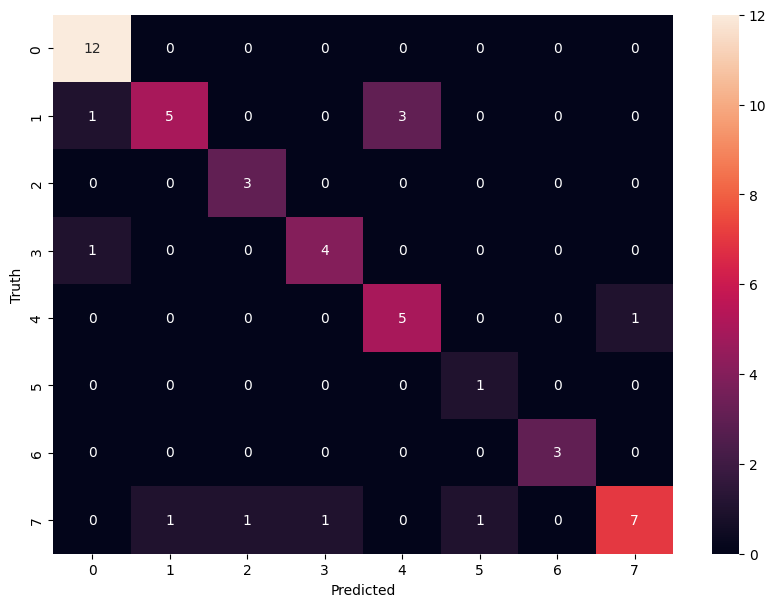

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Lets save the trained Model using Joblib**

In [50]:
import joblib
##to save model as a pickle in a file
joblib.dump(best_classifier, 'svm_saved_model.pkl')
joblib.dump(best_classifier_logistic, 'logistic_saved_model.pkl')

['logistic_saved_model.pkl']

In [52]:
import pickle
with open('svm_classifier_model.pickle','wb') as f:
    pickle.dump(best_classifier,f)

**Save the output_class_dict into json file**

In [51]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(output_class_dict))